# COGS 108 - Final Project 

# Overview

In this project, we basically analyze the data of `salaries` and `ratings` of the chosen four companies in San Diego. We also include some detailed data analysis to further look at the trend and relationship between two variables. During the analyze process, we disprove our hypothesis that the company with the highest average salaries would be most worth working for. Based on our analysis of two variables, **we determine the company that is most worth working for in San Diego.** 

# Names

- Andrew Britten
- Ehsan Ziaeikajbaf
- Miro Markarian
- Hannah Bae
- Shanhua Hu

# Group Members IDs

- A14204847
- A14697109
- A14782391
- A14664736
- A13523943

# Research Question

**Which tech company is worth working for in San Diego?**

We want to measure both `salaries` and `satisfaction` (interpreted by ratings) for four chosen companies -- Illumina, Qualcomm, General Atomics, and Viasat -- in San Diego. Considering both of these two variables, we will conclude the answer to our research question. 


## Background and Prior Work

As senior students, our group members are graduating soon and thus we may face the problem of finding an appropriate job. Based on this situation, we are interested in which company is worth working for in San Diego. We make the hypothesis that the company with the highest average salaries would be most worth working for, since the employee would likely have a higher satisfaction level in general. Specifically, we believe that higher-paying jobs in these companies will have happier employees because the employees could possibly be more educated, balanced work life, and overall more motivated to work. By addressing this research problem, we think we could have higher probabilities of finding appropriate jobs after graduating.

According to the previously published article, `Income and Happiness: Towards a Unified Theory` by Richard A. Easterlin, more income equates to more happiness initially, but as aspirations grow with income, there is a disparity between expected happiness and actual happiness. This article gave us some general idea of how job salaries may be related to job satisfaction. 

Another article related to this topic, `Analyzing Employee Reviews: Google vs Amazon vs Apple vs Microsoft`, addressed the question “which company is it worth working for?” by comparing the ratings between the four companies. The result shows that Google had the highest ratings in work-life balance and happiness. This article also lists out the average ratings of each company with pros and cons. From this article, we got some ideas on how to compare and clean our data from our local San Diego tech industry job satisfaction.

### Reference:

Richard A. Easterlin, Income and Happiness: Towards a Unified Theory, The Economic Journal, Volume 111, Issue 473, July 2001, Pages 465–484, https://doi.org/10.1111/1468-0297.00646

Vourakis, A. (2019, April 26). Analyzing Employee Reviews: Google vs Amazon vs Apple vs Microsoft. Retrieved from https://towardsdatascience.com/analyzing-employee-reviews-google-vs-amazon-vs-apple-vs-microsoft-4dc3c036666b.

# Hypothesis


We hypothesize that **the company with the highest average salaries would be most worth working for.** 

In other words, we predict there exists the relationship that a `higher paying salary` results in overall `greater job satisfaction`. We make this hypothesis and prediction since we strongly believe the higher-paid employees could be more educated, balanced work life, and overall more motivated to work, which would lead to higher satisfaction.

# Dataset(s)

For this project, we collect data from Glassdoor.com reviews (https://www.glassdoor.com/index.htm). We extract the reviews and salaries data for jobs in `Illumina`, `Qualcomm`, `General Atomics` and `Viasat`, with the working area restricted to San Diego. 

**Dataset 1**
- Dataset Name: Reviews 
- Link to the dataset: We extract this data set from the following source (Glassdoor review):  
    - https://www.glassdoor.com/Reviews/Illumina-Reviews-E11671.htm
    - https://www.glassdoor.com/Overview/Working-at-Qualcomm-EI_IE640.11,19.htm
    - https://www.glassdoor.com/Overview/Working-at-General-Atomics-EI_IE5606.11,26.htm
    - https://www.glassdoor.com/Overview/Working-at-Viasat-EI_IE5500.11,17.htm
- Number of observations: 7224

This dataset includes the review of different jobs from the four chosen companies. This dataset including `Job Titles`, `Overall Ratings`, and also detailed ratings of `Culture Ratings`, `Management Ratings`, `Work/Life Balance Rating`, `Compensation and Benefits Ratings`.


**Dataset 2**
- Dataset Name: Salaries 
- Link to the dataset: We extract this data set from the following source (Glassdoor review):
    - https://www.glassdoor.com/Reviews/Illumina-Reviews-E11671.htm
    - https://www.glassdoor.com/Overview/Working-at-Qualcomm-EI_IE640.11,19.htm
    - https://www.glassdoor.com/Overview/Working-at-General-Atomics-EI_IE5606.11,26.htm
    - https://www.glassdoor.com/Overview/Working-at-Viasat-EI_IE5500.11,17.htm
- Number of observations: 449

This dataset includes the average salaries of different jobs from the four chosen companies. This dataset including `Job Titles` and corresponding `Salaries`.

We will combine these two datasets by matching the job titles, that is, we will assign the salaries from `Dataset 2: Salaries` to the corresponding job title in `Dataset 1: Reviews`. Then we will get a  dataset with both reviews and salaries. 

# Setup

## Importing libraries

Here we import the necessary libraries

In [225]:
from time import sleep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

## Importing Data

Here we import the necessary data

In [190]:
df_illumina_reviews = pd.read_csv('data/reviews_Illumina.csv', index_col=0)
df_illumina_salaries = pd.read_csv('data/salaries_Illumina.csv', index_col=0)
df_illumina_reviews['company'] = 'Illumina'
df_illumina_salaries['company'] = 'Illumina'

df_qualcomm_reviews = pd.read_csv('data/reviews_Qualcomm.csv', index_col=0)
df_qualcomm_salaries = pd.read_csv('data/salaries_Qualcomm.csv', index_col=0)
df_qualcomm_reviews['company'] = 'Qualcomm'
df_qualcomm_salaries['company'] = 'Qualcomm'

df_viasat_reviews = pd.read_csv('data/reviews_Viasat.csv', index_col=0)
df_viasat_salaries = pd.read_csv('data/salaries_Viasat.csv', index_col=0)
df_viasat_reviews['company'] = 'Viasat'
df_viasat_salaries['company'] = 'Viasat'

df_generalatomics_reviews = pd.read_csv('data/reviews_General Atomics.csv', index_col=0)
df_generalatomics_salaries = pd.read_csv('data/salaries_General Atomics.csv', index_col=0)
df_generalatomics_reviews['company'] = 'General Atomics'
df_generalatomics_salaries['company'] = 'General Atomics'


df_reviews = df_illumina_reviews.append([df_qualcomm_reviews, df_viasat_reviews, df_generalatomics_reviews], ignore_index = True)
df_salaries = df_illumina_salaries.append([df_qualcomm_salaries, df_viasat_salaries, df_generalatomics_salaries], ignore_index = True)

# Data Cleaning

In [191]:
print("All reviews: {}".format(df_reviews.shape))

df_reviews = df_reviews.dropna(subset = ['career_opportunities_rating', 'comp_benefits_rating', 'culture_values_rating', 'overall_rating', 'senior_management_rating', 'work_life_balance_rating', 'location', 'job_title', 'company'])

print("All reviews with all data present: {}".format(df_reviews.shape))


All reviews: (7224, 15)
All reviews with all data present: (4286, 15)


In [192]:
print("All salaries: {}".format(df_salaries.shape))

df_salaries = df_salaries.dropna(subset = ['job_title' ,'num_salary' ,'salary'])

print("All salaries with all data present: {}".format(df_salaries.shape))

All salaries: (449, 4)
All salaries with all data present: (449, 4)


In [193]:
def normalize_job_title(string):
    
    string = string.lower()
    string = string.strip()
    
    try:
        string_split = string.split("-")
        output = string_split[1].strip()
    except IndexError:
        output = string
    
    return output

def normalize_employment_status(string):
    
    string = string.lower()
    string = string.strip()
    
    output = string.split("-")[0].strip()
    
    return output

#df_reviews['employment_status'] = df_reviews['job_title']
df_reviews['job_title'] = df_reviews["job_title"].apply(normalize_job_title)
#df_reviews['employment_status'] = df_reviews["employment_status"].apply(normalize_employment_status)

### Normalize the job title for salaries

In [194]:
def normalize_job_title_salaries(string):
    
    string = string.lower()
    string = string.strip()
    
    try:
        string_split = string.split("-")
        if string_split[1] == 'hourly' or string_split[1] == 'intern' or string_split[1] == 'hourly intern':
            output = string_split[0].strip()
        else:
            output = string
    except IndexError:
        output = string
    
    return output

df_salaries['job_title'] = df_salaries["job_title"].apply(normalize_job_title_salaries)

### Remove all salaries below 10000

In [195]:
df_salaries = df_salaries[df_salaries['salary'] > 10000]

### Remove the invalid job title

In [196]:
df_reviews = df_reviews[df_reviews['job_title'] != 'california']

### Match reviews with salaries

In [224]:
df = pd.merge(df_reviews, df_salaries, how='left', left_on=['job_title','company'], right_on = ['job_title','company'])

print("All data: {}".format(df.shape))

df = df.dropna(subset=['salary'])

print("Data with salary matched: {}".format(df.shape))


All data: (4272, 17)
Data with salary matched: (2435, 17)


# Data Analysis & Results

### Number of reviews per company

In [223]:
df['company'].value_counts()

Qualcomm           1966
General Atomics     171
Illumina            156
Viasat              142
Name: company, dtype: int64

### Spread of overall rating versus salary

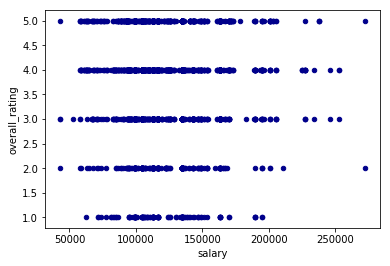

In [199]:
ax1 = df.plot.scatter(x='salary',
                      y='overall_rating',
                      c='DarkBlue')

We first use a scatter plot of **overall rating versus salary** to get some general impression of how rating may be related to the salary.

We can see that there is a similar spread of ratings for salaries in the mid-range (70k - 150k). However, as salary increases past 200k, there are almost no ratings below 3.0. This result somehow slightly enhances our hypothesis that salary could be related to the overall rating of the job.

##  Company rating average

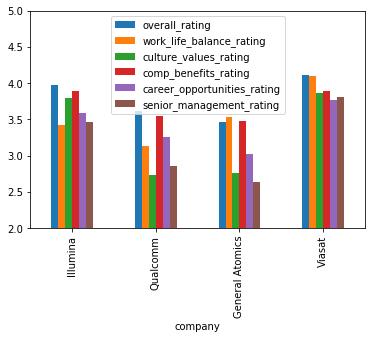

In [200]:
reviews_illumina_mean = df[df['company'] == 'Illumina'].mean()
reviews_qualcomm_mean = df[df['company'] == 'Qualcomm'].mean()
reviews_ga_mean = df[df['company'] == 'General Atomics'].mean()
reviews_viasat_mean = df[df['company'] == 'Viasat'].mean()



ratings_means_df = pd.DataFrame({'company': ['Illumina', 'Qualcomm', 'General Atomics', 'Viasat'], 
                         'overall_rating': [x['overall_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                         'work_life_balance_rating': [x['work_life_balance_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                         'culture_values_rating': [x['culture_values_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                         'comp_benefits_rating': [x['comp_benefits_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                         'career_opportunities_rating': [x['career_opportunities_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                         'senior_management_rating': [x['senior_management_rating'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                        })

ratings_means_df = ratings_means_df.set_index('company')

ratings_means_df.plot(kind='bar', ylim=(2,5))

We use a bar-chart to present the **Company rating average** for both overall ratings and detailed ratings for different categories.

The blue bar in the above graph displays the average overall ratings of each rating metric we consider for each company. We can see that `Viasat` has the highest average of overall rating, while `General Atomics` has the lowest. 

For each detailed ratings, we can see from the above plot that `Viasat` is having the highest ratings in almost all the categories; `Illumina` is having 2nd highest ratings in general; while `Qualcomm` and `General Atomics` have relatively low ratings, especially for 'culture-values rating' and 'senior-management rating'.

## Company salary average

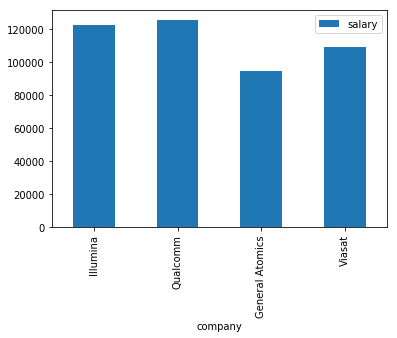

In [201]:
salaries_means_df = pd.DataFrame({'company': ['Illumina', 'Qualcomm', 'General Atomics', 'Viasat'], 
                                  'salary': [x['salary'] for x in [reviews_illumina_mean, reviews_qualcomm_mean, reviews_ga_mean, reviews_viasat_mean]],
                                 })

salaries_means_df = salaries_means_df.set_index('company')

salaries_means_df.plot(kind='bar')

We use a bar-chart to present the **Company salary average** for each company.
From the above plot, we can see that `Qualcomm` has the highest average salary; `Illumina` has the 2nd highest average salary; following by `Viasat` and `General Atomics`.

However, comparing to the **Company rating average** above, we figure out that although `Viasat` has the highest rating, it only has the 2nd lowest average salary; although `Qualcomm` has the highest average salary, the corresponding overall rating is pretty low. 

The comparison of the two plots above undermines our hypothesis, and shows that higher salaries may not lead to higher satisfaction levels. 

Based on the result displayed in the cells above, we decide to look more detailed information to further prove or disprove our hypothesis. 

In this case, we choose to graph the plot comparing the `salary` and `corresponding satisfaction` (interpreted by the overall rating) for specific `job titles` for each company.

### Average Overall Job Rating and Salaries at Illumina

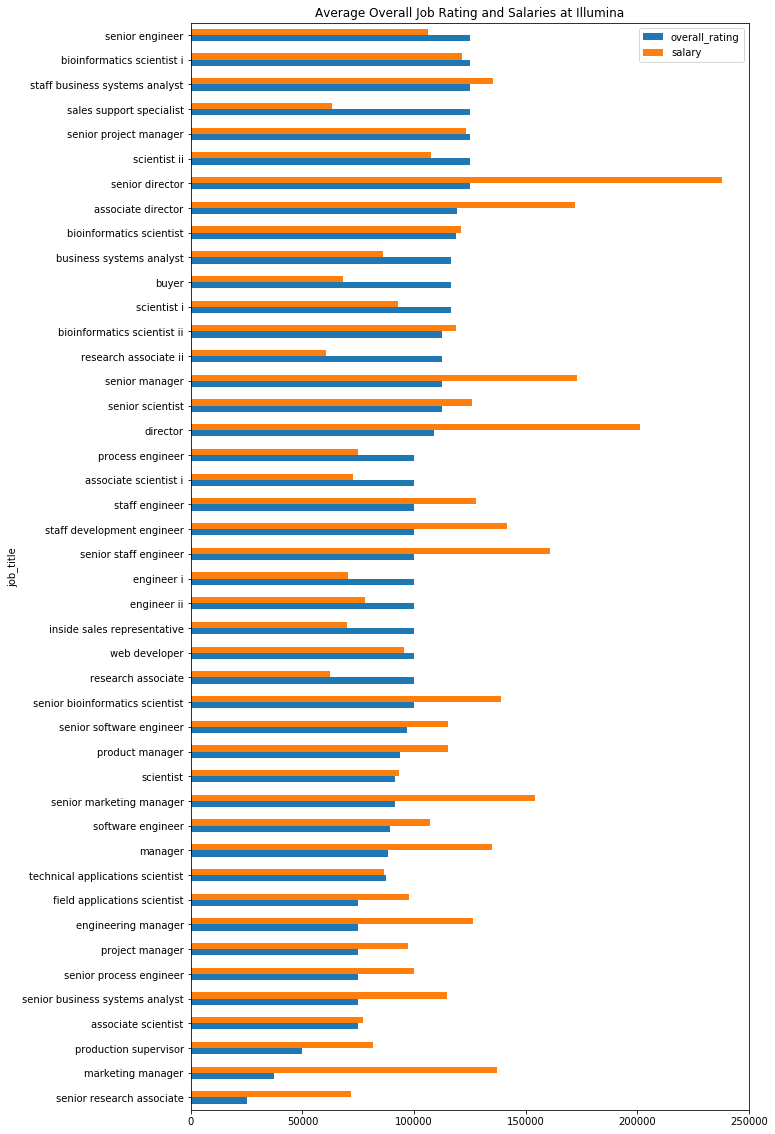

In [202]:
avg_ratings_overall_rating = df[df['company'] == 'Illumina'].groupby(['job_title'])['overall_rating'].agg(lambda x: x.sum()/len(x))
avg_ratings_salary = df[df['company'] == 'Illumina'].groupby(['job_title'])['salary'].agg(lambda x: x.sum()/len(x))

# Scale ratings so we can plot them next to salaries
avg_ratings_overall_rating = avg_ratings_overall_rating * 25000

# Combine salaries and ratings
avg_s_d = pd.concat([avg_ratings_overall_rating, avg_ratings_salary], axis=1)

# Sort data frame based on overall rating
avg_s_d = avg_s_d.sort_values('overall_rating')

avg_s_d.plot(kind='barh', figsize=(10,20), title='Average Overall Job Rating and Salaries at Illumina')



The above bar-chart shows **Average Overall Job Rating and Salaries at Illumina**.

We display this plot in such a way that the satisfaction is in descending order, in order to view the relationship between `salary` and `satisfaction` of specific `job title`. According to our hypothesis, we predicted that the salary of each job title should also in descending order in general. However, we cannot see such a trend in the plot. 

Instead, we can see that there are some job titles with high salaries but low satisfaction. For example, the marketing manager, having a mid-high level salary, only gets second last satisfaction. There also exist some jobs with high satisfaction but relatively low salaries. For example, the sales support specialist, have high satisfaction but only have a relatively low salary. 

Thus, we further disprove our hypothesis since it can be seen from the above plot that the `salaries` and `satisfaction` of specific `job titles` are not related in general. 

### Average Overall Job Rating and Salaries at Qualcomm

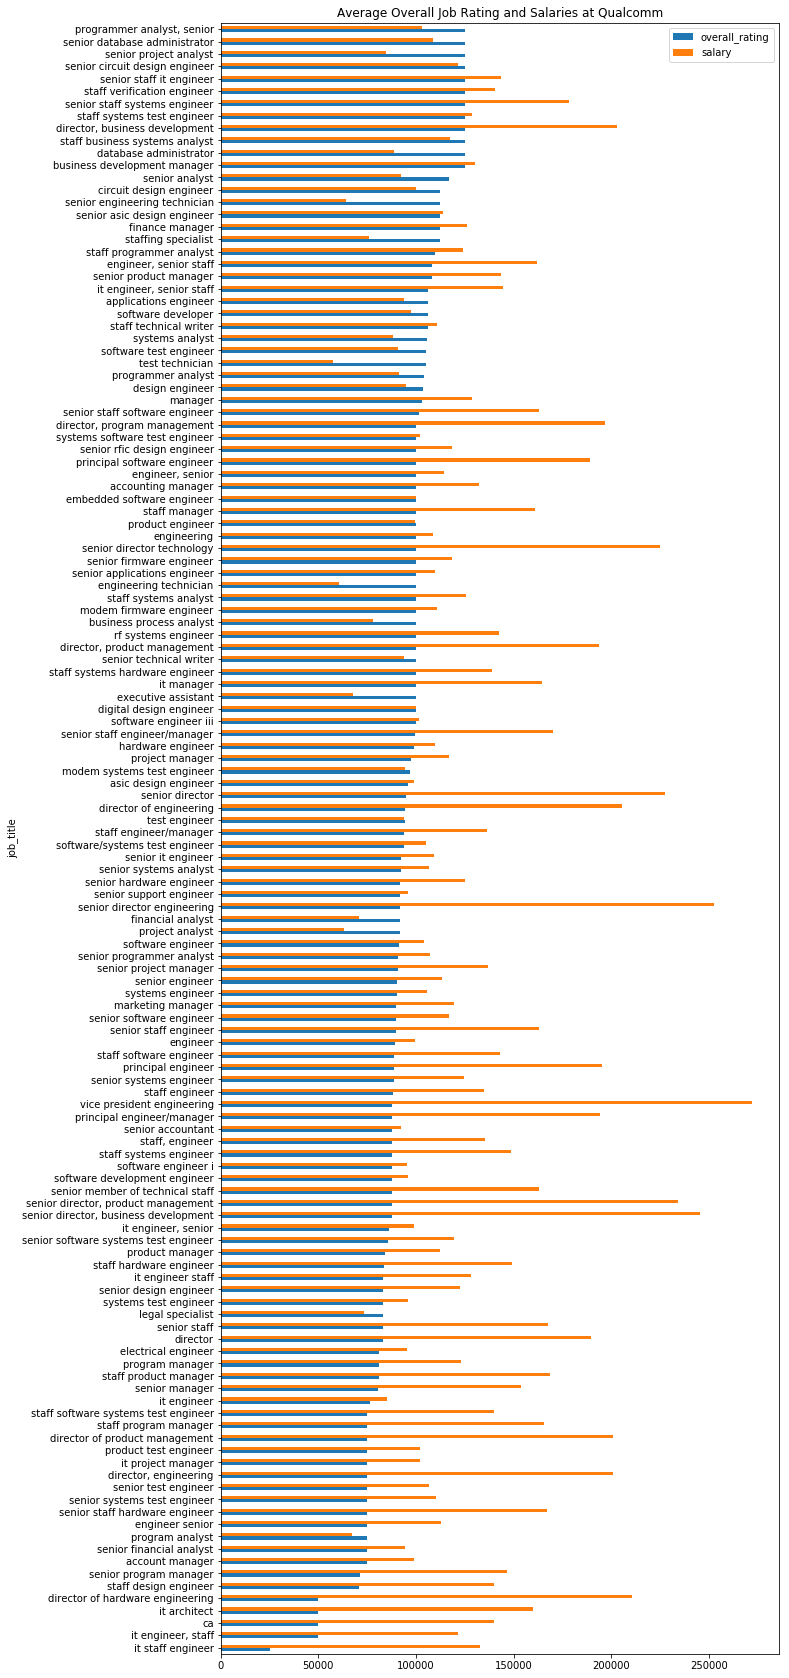

In [203]:
avg_ratings_overall_rating = df[df['company'] == 'Qualcomm'].groupby(['job_title'])['overall_rating'].agg(lambda x: x.sum()/len(x))
avg_ratings_salary = df[df['company'] == 'Qualcomm'].groupby(['job_title'])['salary'].agg(lambda x: x.sum()/len(x))

# Scale ratings so we can plot them next to salaries
avg_ratings_overall_rating = avg_ratings_overall_rating * 25000

# Combine salaries and ratings
avg_s_d = pd.concat([avg_ratings_overall_rating, avg_ratings_salary], axis=1)

# Sort data frame based on overall rating
avg_s_d = avg_s_d.sort_values('overall_rating')

avg_s_d.plot(kind='barh', figsize=(10,30), title='Average Overall Job Rating and Salaries at Qualcomm')


The above bar-chart shows **Average Overall Job Rating and Salaries at Qualcomm**.

Similarly to the last plot, we display this plot in such a way that the satisfaction is in descending order, in order to view the relationship between `salary` and `satisfaction` of specific `job title`. According to our hypothesis, we predicted that the salary of each job title should also in descending order in general. However, we cannot see such a trend in the plot. 

Instead, we can see that there are some job titles with high salaries but low satisfaction. For example, the director of hardware engineering, having a high level salary, only gets second last satisfaction. There also exist some jobs with high satisfaction but relatively low salaries. For example, the senior project analyst, have high satisfaction but only have a relatively low salary. 

Thus, we further disprove our hypothesis since it can be seen from the above plot that the `salaries` and `satisfaction` of specific `job titles` are not related in general. 

### Average Overall Job Rating and Salaries at Viasat

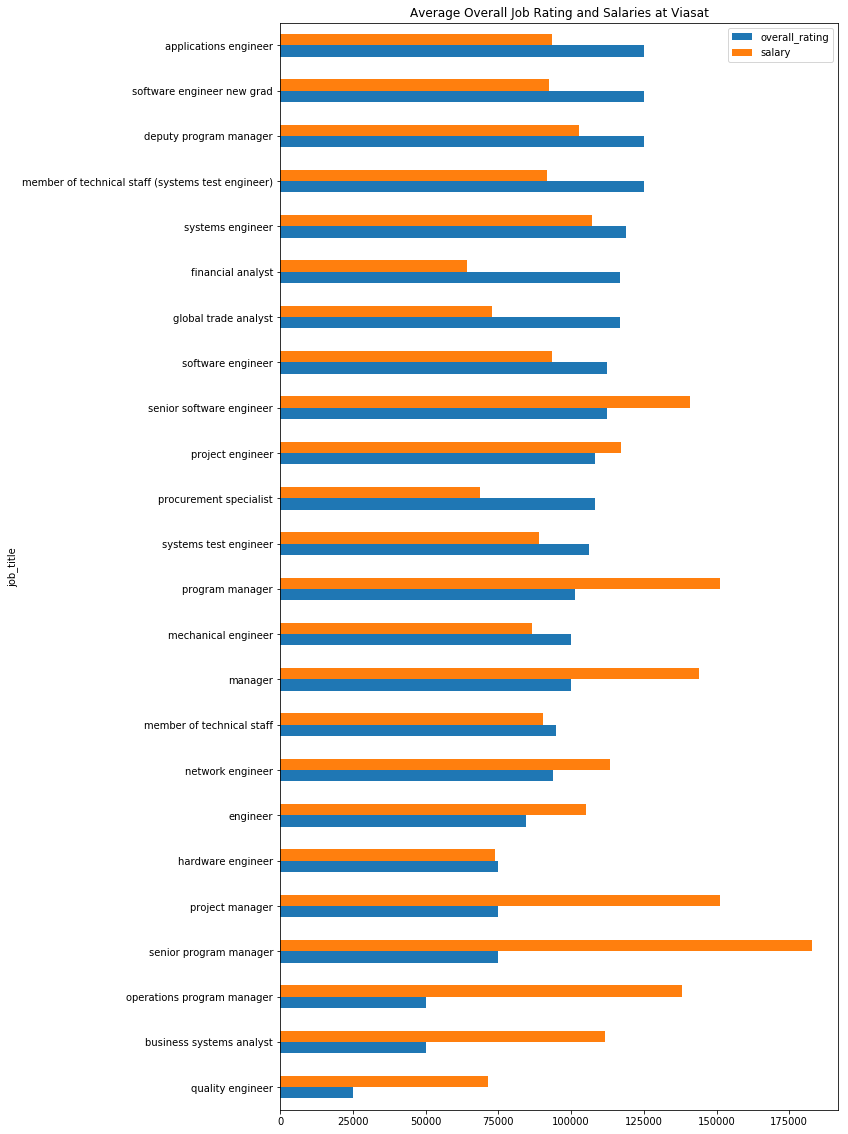

In [204]:
avg_ratings_overall_rating = df[df['company'] == 'Viasat'].groupby(['job_title'])['overall_rating'].agg(lambda x: x.sum()/len(x))
avg_ratings_salary = df[df['company'] == 'Viasat'].groupby(['job_title'])['salary'].agg(lambda x: x.sum()/len(x))

# Scale ratings so we can plot them next to salaries
avg_ratings_overall_rating = avg_ratings_overall_rating * 25000

# Combine salaries and ratings
avg_s_d = pd.concat([avg_ratings_overall_rating, avg_ratings_salary], axis=1)

# Sort data frame based on overall rating
avg_s_d = avg_s_d.sort_values('overall_rating')

avg_s_d.plot(kind='barh', figsize=(10,20), title='Average Overall Job Rating and Salaries at Viasat')

The above bar-chart shows **Average Overall Job Rating and Salaries at Viasat**.

Similarly to the last two plots, we display this plot in such a way that the satisfaction is in descending order, in order to view the relationship between `salary` and `satisfaction` of specific `job title`. According to our hypothesis, we predicted that the salary of each job title should also in descending order in general. However, we cannot see such a trend in the plot. 

Instead, we can see that there are some job titles with high salaries but low satisfaction. For example, the senior program manager, having the highest salary, gets low satisfaction. There also exist some jobs with high satisfaction but relatively low salaries. For example, the financial analyst, have high satisfaction but only have a relatively low salary. 

Thus, we further disprove our hypothesis since it can be seen from the above plot that the `salaries` and `satisfaction` of specific `job titles` are not related in general. 

### Average Overall Job Rating and Salaries at General Atomics

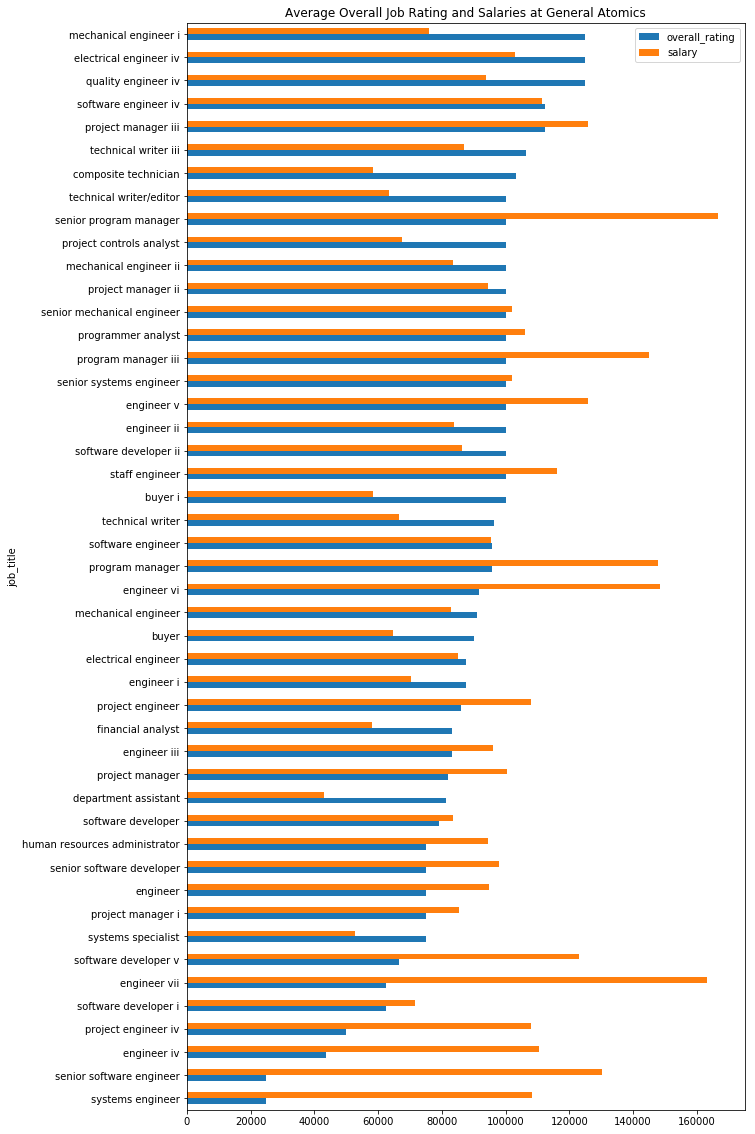

In [205]:
avg_ratings_overall_rating = df[df['company'] == 'General Atomics'].groupby(['job_title'])['overall_rating'].agg(lambda x: x.sum()/len(x))
avg_ratings_salary = df[df['company'] == 'General Atomics'].groupby(['job_title'])['salary'].agg(lambda x: x.sum()/len(x))

# Scale ratings so we can plot them next to salaries
avg_ratings_overall_rating = avg_ratings_overall_rating * 25000

# Combine salaries and ratings
avg_s_d = pd.concat([avg_ratings_overall_rating, avg_ratings_salary], axis=1)

# Sort data frame based on overall rating
avg_s_d = avg_s_d.sort_values('overall_rating')

avg_s_d.plot(kind='barh', figsize=(10,20), title='Average Overall Job Rating and Salaries at General Atomics')

The above bar-chart shows **Average Overall Job Rating and Salaries at General Atomics**.

Similarly to the last two plots, we display this plot in such a way that the satisfaction is in descending order, in order to view the relationship between `salary` and `satisfaction` of specific `job title`. According to our hypothesis, we predicted that the salary of each job title should also in descending order in general. However, we cannot see such a trend in the plot. 

Instead, we can see that there are some job titles with high salaries but low satisfaction. For example, the engineer vii, having the second highest salary, gets low satisfaction. There also exist some jobs with high satisfaction but relatively low salaries. For example, the composite technician, have high satisfaction but only have a relatively low salary. 

Thus, we further disprove our hypothesis since it can be seen from the above plot that the `salaries` and `satisfaction` of specific `job titles` are not related in general. 



In the following cells, we **test the distribution of the independent variable `salary`**, **check the outliers** and **test the fitness of the linear regression line**.

## Testing for normality of salaries

In [241]:
companies = df['company'].unique()

for company in companies:
    h_qc = df[df['company'] == company]['salary'].values

    st_qc, p_qc = stats.normaltest(h_qc)

    alpha = 0.01
    is_n_qc = bool(~(p_qc < alpha))

    if is_n_qc:
        print("Salary data for {} is normal.".format(company))
    else:
        print("Salary data for {} is not normal.".format(company))

Salary data for Illumina is not normal.
Salary data for Qualcomm is not normal.
Salary data for Viasat is not normal.
Salary data for General Atomics is not normal.


In the above cell, we test for the `normality` for salaries' distribution for each company. The displayed results show that **the salaries' distributions are not normal for all the companies.** 

## Checking Outliers

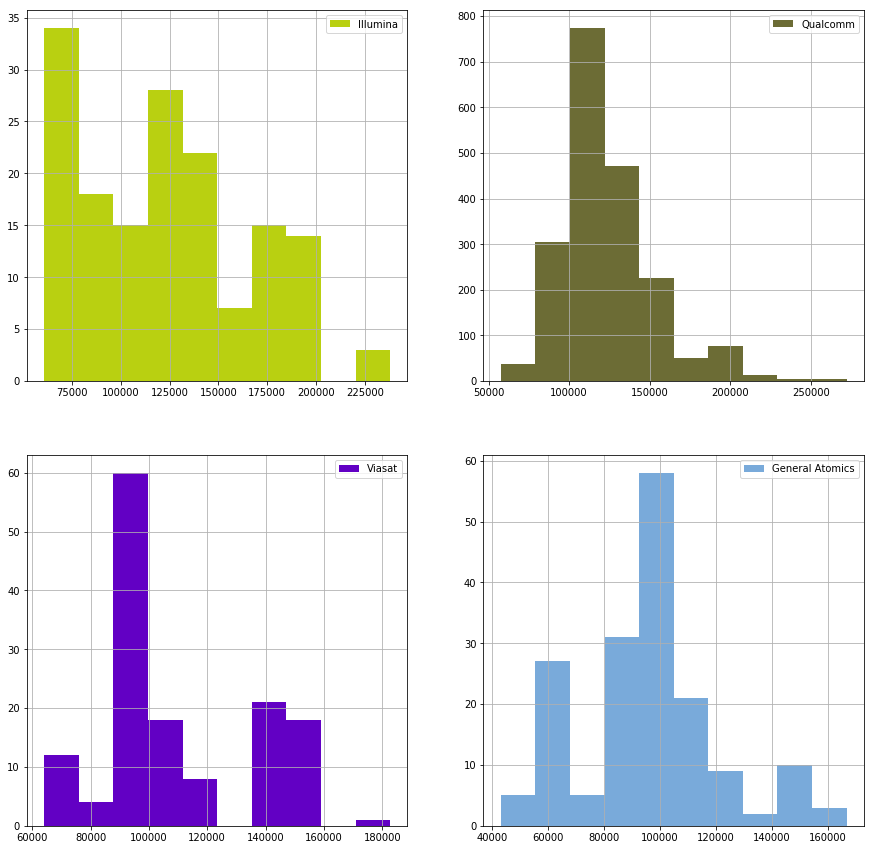

In [261]:
companies = df['company'].unique()

f, axs = plt.subplots(2,2,figsize=(15,15))

for i, company in enumerate(companies):
    plt.subplot(2,2, i+1)
    salaries = df[df["company"] == company]["salary"]
    salaries.hist(label=company, color=np.random.rand(3,))
    
    plt.legend()

We use the histogram of the distribution of the salaries for each company to check whether there are some **outliers** in our salaries' data or not.

From the plot above, we can see that `Illumina` has 3 outliers with salaries of about 225,000, and `Viasat` has1 outlier with a salary of about 180,000.
`Qualcomm` and `General Atomics` have no outlier in general.

In addition, from the histogram above, we see that the salaries' distributions for each company are positively skewed in general. 

## Testing for linear relationship between salary and overall rating

In [248]:
outcome_1, predictors_1 = patsy.dmatrices('overall_rating ~ salary', df)
mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()

# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7588
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.384
Time:                        22:16:34   Log-Likelihood:                -3660.6
No. Observations:                2435   AIC:                             7325.
Df Residuals:                    2433   BIC:                             7337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7371      0.090     41.554      0.0

Based on our hypothesis -- higher salary leads to higher satisfaction, we predict that there should be a positive linear relationship between `salary` and `satisfaction`.

We try to fit the linear regression line to `salary` and `satisfaction` (which could be interpreted by the overall rating). Then we use a t-test on this linear regression in order to figure out whether the regression line is a "good fit" or not. Our Null Hypothesis H0 in this test is that "there is NO linear relationship between salary and satisfaction".

We take the convention alpha level 0.05 for this test. From the result of the t-test, we see that the p-value is 0.384 >> 0.05 = alpha. Thus, we fail to reject the null hypothesis in this test. In other words, **there is very unlikely to have a linear relationship between salary and satisfaction.**

# Ethics & Privacy

Since we are collecting our data from Glassdoor, we know that we have the informed consent of individuals because they volunteer to give data. Additionally, these individuals' reviews are shown without revealing their identity, maintaining confidentiality. The potential problem is that there may be some inherent bias as to which individuals volunteer to contribute their data to these websites. For instance, someone who has an extremely negative or extremely positive review of a company/job may be more inclined to write a review. To combat this, we can take a holistic look at the reviews for a company and make sure the ratings and comments are spread across the range of ratings.

The potential risk in ethical consideration in the post-analysis stage is that the result may "hurt" some companies. Because this project may conclude a ranking for the chosen four companies (i.e. Illumina, Qualcomm, General Atomics, and Viasat). This result may be further inferred that some of the companies are "relatively bad", and thus may hurt the reputation of certain companies. Therefore, we decide to keep this project for research interest and would not publish it to criticize any company.

# Conclusion & Discussion

From the data we have collected and analyzed, we conclude that there is **no significant correlation between salary and overall rating.** While salary is a factor in job satisfaction, other factors, namely work-life balance, company culture, management, benefits, and career opportunities seem to have an effect on overall job satisfaction. Moreover, since Illumina has both a relatively high average salary and relatively high ratings, we conclude that based on our basic analysis, **Illumina is the company that most worth working for in San Diego.** 

However, our analysis still has a lot of limitations. Our data was limited to that available on Glassdoor by employees who have volunteered to take time to provide their data and review. This is a very narrow dataset compared to the actual number of employees working for these companies, many of whom do not share their experience on Glassdoor. Moreover, this dataset from Glassdoor may contain some inherent bias, in that employees with stronger opinions (whether positive or negative) may be more inclined to leave a review.